# Семинар 18

# Линейное программирование. Прямой метод внутренней точки

## На прошлом семинаре...

- Постановки задачи линейного программирования
- Примеры приложений
- Симплекс-метод и его недостатки

## Обзор существующих библиотек для решения задачи линейного программирования

- Решение задачи линейного прграммирования стало полноценной технологией, поэтому обычно нужно вызвать правильную функцию на правильном языке и получить ответ. 
- Обзор можно найти [тут](https://en.wikipedia.org/wiki/Linear_programming#Solvers_and_scripting_.28programming.29_languages)
- Сравнение можно найти [тут](http://prod.sandia.gov/techlib/access-control.cgi/2013/138847.pdf)

## Немного истории

- В 1979 г. Л. Хачиян [предложил](http://www.mathnet.ru/links/18409a6ec8cd239985969a9e98c2f6ae/zvmmf5239.pdf) метод эллипсоидов и показал, что он решает любую задачу линейного программирования за **полиномиальное время**. Сообщение об этом появилось на [первой полосе New York Times 7 ноября 1979](http://www.nytimes.com/1979/11/07/archives/a-soviet-discovery-rocks-world-of-mathematics-russians-surprise.html?_r=0). Популярное изложение успехов советской школы математического программирования в статье [Коммерсанта](https://www.kommersant.ru/doc/2679807).
- Однако сложность метода эллипсоидов $O(n^6 L^2)$, и он проигрывал симплекс-методу при решении реальных задач
- В 1984 г. Н. Кармаркар [предложил](http://retis.sssup.it/~bini/teaching/optim2010/karmarkar.pdf) другой полиномиальный метод решения задачи линейного программирования, который был значительно быстрее метода эллипсоидов, а именно $O(n^{3.5} L^2)$.  
- И метод эллипсоидов, и метод Кармаркара относятся к прямо-двойственным методам или методам внутренней точки, которые будут освещены далее...

## Альтернатива симплекс-методу

- Симплекс-метод основан на подходе поиска решения среди вершин
- Однако можно искать решение по-другому: двигаться по точкам внутри области к одной из вершин - решению задачи
- Поэтому такие методы называют *методами внутренней точки* 

## "Дёшево, но много" vs. "дорого, но мало"

- Один из основных водоразделов в методах оптимизации
- Линейное программирование решается за полиномиальное время, эксплуатируя стратегию "дорого, но мало"
- Далее будут показаны задачи и методы, которые работают по стратегии "дёшево, но много"

## Двойственность в задаче линейного программирования

**Теорема.**

- Если прямая (двойственная) задачи имеет конечное решение, то конечное решение имеет и двойственная (прямая).
- Если прямая (двойственная) задача неограничена, то допустимое множество двойственной (прямой) задачи пусто.

## Идея методов внутренней точки

Исходная задача
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax = b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}

Аппроксимированная задача
\begin{align*}
&\min_x c^{\top}x {\color{red}{- \mu \sum\limits_{i=1}^n \ln x_i}} \\
\text{s.t. } & Ax = b\\
\end{align*}
для некоторого $\mu > 0$

### Барьерная функция

**Определение.** Функция $B(x, \mu) = -\mu\ln x$ называется *барьерной* для задачи с ограничением $x \geq 0$.

Более подробно о таких функциях будет рассказано в контексте нелинейной условной оптимизации...

### Что произошло?

- Сделали из линейной задачу нелинейную
- Перенесли ограничение типа неравенства в целевую функцию
- Ввели дополнительный параметр $\mu$

### Почему это хорошо?

Переход к задаче с ограничениями типа равенств $\to$ упрощение условий оптимальности, в частности

- Исключено требование дополняющей нежёсткости
- Исключено условие неотрицательности множителя Лагранжа для ограничения типа неравенства

### Условия оптимальности

- Лагранжиан: $L = c^{\top}x - \mu\sum\limits_{i=1}^n \ln x_i + \lambda^{\top}(Ax - b)$
- Стационарная точка $L$: 
$$
c - \mu X^{-1}e + A^{\top}\lambda = 0,
$$
где $X = \mathrm{diag}(x_1, \dots, x_n)$ и $e = [1, \dots, 1]$
- Ограничение типа равенства: $Ax = b$

Пусть $s = \mu X^{-1}e$, тогда условия оптимальности можно переписать так:
- $A^{\top}\lambda + c - s = 0 $
- $Xs = {\color{red}{\mu e}}$
- $Ax = b$

Также $x > 0 \Rightarrow s > 0$ 

## Сравнение с условиями оптимальности для исходной задачи

- Лагранжиан: $L = c^{\top}x + \lambda^{\top}(Ax - b) - s^{\top}x$
- Условие стационарности: $c + A^{\top}\lambda - s = 0$
- Допустимость прямой задачи: $Ax = b, \; x \geq 0$
- Допустимость двойственной: $s \geq 0$
- Условие дополняющей нежёсткости: $s_ix_i = 0$

### После упрощения

- $A^{\top}\lambda + c - s = 0$
- $Ax = b$
- $Xs = {\color{red}{0}}$
- $x \geq 0, \; s \geq 0$

### Вывод

- Введение барьерной функции c множителем $\mu$ эквивалентно релаксации условий дополняющей нежёсткости на параметр $\mu$
- При $\mu \to 0$ решения задач совпадают!
- Идея: итеративно решать задачи с барьерной функцией, уменьшая $\mu$. Последовательность решений сойдётся к вершине симплекса по траектории из точек, лежащих внутри симплекса.

### Общая схема
```python
def GeneralInteriorPointLP(c, A, b, x0, mu0, rho, tol):
    x = x0
    mu = mu0
    e = np.ones(c.shape[0])
    while True:
        primal_var, dual_var = StepInsideFeasibleSet(c, A, b, x, mu)
        mu *= rho
        if converge(primal_var, dual_var, c, A, b, tol) and mu < tol:
            break
    return x
```

## Как решать задачу с барьерной функцией?

- Прямой метод - следующий слайд
- Прямо-двойственный метод - через несколько недель

## Прямой метод

Вспомним исходную задачу:
\begin{align*}
&\min_x c^{\top}x - \mu \sum\limits_{i=1}^n \ln x_i \\
\text{s.t. } & Ax = b\\
\end{align*}

Идея: приблизим целевую функцию до второго порядка, как в методе Ньютона.

### Реализация
На $(k+1)$-ой итерации необходимо решить следующую задачу: 
\begin{align*}
&\min_p \frac{1}{2}p^{\top}Hp + g^{\top}p\\
\text{s.t. } & A(x_k + p) = b,\\
\end{align*}
где $H = \mu X^{-2}$ - гессиан, и $g = c - \mu X^{-1}e$ - градиент.

### Снова KKT

Выпишем условия ККТ для этой задачи
- $Hp + g + A^{\top}\lambda = 0$
- $Ap = 0$

или
$$\begin{bmatrix}
H & A^{\top}\\
A & 0
\end{bmatrix}
\begin{bmatrix}
p\\
\lambda
\end{bmatrix}
= 
\begin{bmatrix}
-g\\
0
\end{bmatrix}$$

Из первой строки:
$$
-\mu X^{-2}p + A^{\top}\lambda = c - \mu X^{-1}e
$$
$$
-\mu Ap + AX^{2}A^{\top}\lambda = AX^2c - \mu AXe
$$
$$
AX^{2}A^{\top}\lambda = AX^2c - \mu AXe
$$
Так как $X \in \mathbb{S}^n_{++}$ и $A$ полного ранга, то уравнение имеет единственное решение $\lambda^*$.

### Найдём направление $p$

$$
-\mu p + X^2A^{\top}\lambda^* = X^2c - \mu Xe = X^2c - \mu x
$$
$$
p = x + \frac{1}{\mu}X^2(A^{\top}\lambda^* - c)
$$

### Поиск шага $\alpha$

- Обычный линейный поиск с условиями достаточного убывания
- Условие $A(x_k + \alpha p) = b$ выполняется автоматически

### Псевдокод прямого барьерного метода

```python
def PrimalBarrierLP(c, A, b, x0, mu0, rho, tol):
    x = x0
    mu = mu0
    e = np.ones(x.shape[0])
    while True:
        p, lam = ComputeNewtonDirection(c, x, A, mu)
        alpha = line_search(p, mu, c, x)
        x = x + alpha * p
        mu = rho * mu
        if mu < tol and np.linalg.norm(x.dot(c - A.T.dot(lam)) - mu * e) < tol:
            break
    return x
```

## Сравнение барьерного метода и прямого метода внутренней точки

- Пример Klee-Minty c прошлого семинара
\begin{align*}
& \max_{x \in \mathbb{R}^n} 2^{n-1}x_1 + 2^{n-2}x_2 + \dots + 2x_{n-1} + x_n\\
\text{s.t. } & x_1 \leq 5\\
& 4x_1 + x_2 \leq 25\\
& 8x_1 + 4x_2 + x_3 \leq 125\\
& \ldots\\
& 2^n x_1 + 2^{n-1}x_2 + 2^{n-2}x_3 + \ldots + x_n \leq 5^n\\
& x \geq 0
\end{align*}
- Какая сложность работы симплекс метода?

- Сведение к стандартной форме
$$
\begin{align*}
& \min_{x, \; z} -c^{\top}x \\
\text{s.t. } & Ax + z = b\\
& x \geq 0, \quad z \geq 0
\end{align*}
$$
- Сравним скорось работы прямого барьерного метода и симплекс-метода

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as scopt
import scipy.linalg as sclin
plt.rc("text", usetex=True)

In [2]:
def NewtonLinConstraintsFeasible(f, gradf, hessf, A, b, x0, line_search, linsys_solver, args=(), disp=False, 
                         callback=None, tol=1e-6, max_iter=100, **kwargs):
    x = x0.copy()
    n = x0.shape[0]
    iteration = 0
    lam = np.random.randn(A.shape[0])
    while True:
        gradient, hess = gradf(x, *args), hessf(x, *args)
        h = linsys_solver(hess, A, gradient)
        descent_dir = h[:n]
        decrement = descent_dir.dot(hessf(x, *args).dot(descent_dir))
        if decrement < tol:
            break
        alpha = line_search(x, descent_dir, f, gradf, args, **kwargs)
        x = x + alpha * descent_dir
        if callback is not None:
            callback((descent_dir, x))
        iteration += 1
        if disp:
            print("Current function val = {}".format(f(x, *args)))
            print("Newton decrement = {}".format(decrement))
        if iteration >= max_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": decrement}
    return res

In [3]:
def simple_solver(hess, A, gradient):
    n = hess.shape[0]
    n_lin_row, n_lin_col = A.shape
    modified_hess = np.zeros((n + n_lin_row, n + n_lin_row))
    modified_hess[:n, :n] = hess
    modified_hess[n:n + n_lin_row, :n_lin_col] = A
    modified_hess[:n_lin_col, n:n + n_lin_row] = A.T
    rhs = np.zeros(n + n_lin_row)
    rhs[:n] = -gradient
    h = np.linalg.solve(modified_hess, rhs)
    return h

def elimination_solver(hess, A, gradient):
    inv_hess_diag = 1 / np.diag(hess)
    inv_hess_grad = -inv_hess_diag * gradient
    rhs = A.dot(inv_hess_grad)
    L_inv_hess = np.sqrt(inv_hess_diag)
    AL_inv_hess = A * L_inv_hess
    S = AL_inv_hess.dot(AL_inv_hess.T)
#     cho_S = sclin.cho_factor(S)
#     w = sclin.cho_solve(cho_S, rhs)
    w = np.linalg.solve(S, rhs)
    v = inv_hess_grad - inv_hess_diag * A.T.dot(w)
    h = np.zeros(hess.shape[1] + A.shape[0])
    h[:hess.shape[1]] = v
    h[hess.shape[1]:hess.shape[1] + A.shape[0]] = w
    return h

In [4]:
def backtracking(x, descent_dir, f, grad_f, args, **kwargs):
    beta1 = kwargs["beta1"]
    rho = kwargs["rho"]
    alpha = 1
    while f(x + alpha * descent_dir, *args) >= f(x, *args) + beta1 * alpha * grad_f(x, *args).dot(descent_dir) \
            or np.isnan(f(x + alpha * descent_dir, *args)):
        alpha *= rho
        if alpha < 1e-16:
            break
    return alpha

In [5]:
def generate_KleeMinty_test_problem(n):
    c = np.array([2**i for i in range(n)])
    c = -c[::-1]
    bounds = [(0, None) for i in range(n)]
    b = np.array([5**(i+1) for i in range(n)])
    a = np.array([1] + [2**(i+1) for i in range(1, n)])
    A = np.zeros((n, n))
    for i in range(n):
        A[i:, i] = a[:n-i]
    return c, A, b, bounds

In [6]:
n = 7
c, A, b, _ = generate_KleeMinty_test_problem(n)

def f(x, c, mu):
    n = c.shape[0]
    return c.dot(x[:n]) - mu * np.sum(np.log(x))

def gradf(x, c, mu):
    grad = np.zeros(len(x))
    n = c.shape[0]
    grad[:n] = c - mu / x[:n]
    grad[n:] = -mu / x[n:]
    return grad

def hessf(x, c, mu):
    return mu * np.diag(1 / x**2)

A_lin = np.zeros((n, n + A.shape[0]))
A_lin[:n, :n] = A
A_lin[:n, n:n + A.shape[0]] = np.eye(A.shape[0])
mu = 0.1

#### Проверим верно ли вычисляется градиент

In [7]:
scopt.check_grad(f, gradf, np.random.rand(n), c, mu)

4.3716735070639198e-07

### Выбор начального приближения допустимого по ограничениям и области определения целевой функции

In [8]:
x0 = np.zeros(2*n)
x0[:n] = np.random.rand(n)
x0[n:2*n] = b - A.dot(x0[:n])
print(np.linalg.norm(A_lin.dot(x0) - b))
print(np.sum(x0 <= 1e-6))

1.45594627876e-11
0


### Проверим сходимость

Decrement value = 1.2911328288164593e-10


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


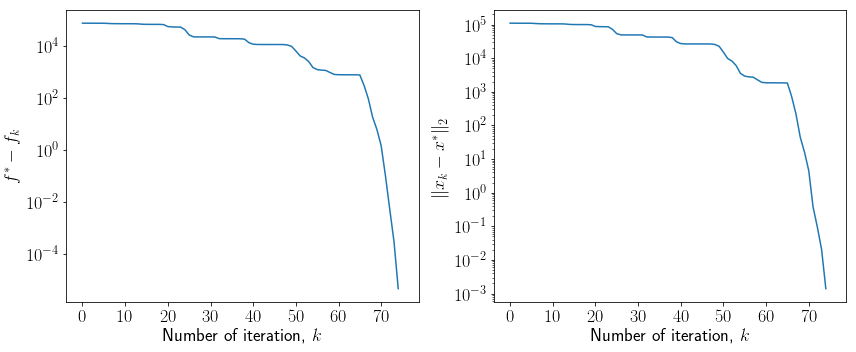

In [9]:
hist_conv = []
def cl(x):
    hist_conv.append(x)
res = NewtonLinConstraintsFeasible(f, gradf, hessf, A_lin, b, x0, backtracking, elimination_solver, (c, mu), callback=cl,
                           max_iter=2000, beta1=0.1, rho=0.7)
print("Decrement value = {}".format(res["tol"]))
fstar = f(res["x"], c, mu)
hist_conv_f = [np.abs(fstar - f(descdir_x[1], c, mu)) for descdir_x in hist_conv]
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.semilogy(hist_conv_f)
plt.xlabel("Number of iteration, $k$", fontsize=18)
plt.ylabel("$f^* - f_k$", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

hist_conv_x = [np.linalg.norm(res["x"] - x[1]) for x in hist_conv]
plt.subplot(1,2,2)
plt.semilogy(hist_conv_x)
plt.xlabel("Number of iteration, $k$", fontsize=18)
plt.ylabel("$\| x_k - x^*\|_2$", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)
plt.tight_layout()

### Реализация барьерного метода

In [10]:
def BarrierPrimalLinConstr(f, gradf, hessf, A, b, x0, mu0, rho_mu, linesearch, linsys_solver, 
                           args=(), tol=1e-6, max_iter=100, **kwargs):
    x = x0.copy()
    n = x0.shape[0]
    mu = mu0
    while True:
        res = NewtonLinConstraintsFeasible(f, gradf, hessf, A, b, x, linesearch, linsys_solver, (c, mu),
                                           beta1=0.01, rho=0.5)
        x = res["x"]
        if n * mu < tol:
            break
        mu *= rho_mu
    return x

In [11]:
mu0 = 10
rho_mu = 0.5
x = BarrierPrimalLinConstr(f, gradf, hessf, A_lin, b, x0, mu0, rho_mu, backtracking, elimination_solver, (c, ))
%timeit BarrierPrimalLinConstr(f, gradf, hessf, A_lin, b, x0, mu0, rho_mu, backtracking, elimination_solver, (c, ))
%timeit BarrierPrimalLinConstr(f, gradf, hessf, A_lin, b, x0, mu0, rho_mu, backtracking, simple_solver, (c, ))
print(x[:n])

/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log
/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


2.33 s ± 327 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


26.3 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
[  1.18542806e-06   2.37068457e-06   4.74123026e-06   9.48234901e-06
   1.89646087e-05   3.79291460e-05   7.81250907e+04]


### Сравнение времени работы

In [12]:
mu0 = 2
rho_mu = 0.5
n_list = range(3, 16)
n_iters = np.zeros(len(n_list))
times_simplex = np.zeros(len(n_list))
times_barrier_simple = np.zeros(len(n_list))
for i, n in enumerate(n_list):
    print("Current dimension = {}".format(n))
    c, A, b, bounds = generate_KleeMinty_test_problem(n)
    res = scopt.linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list)})
    time = %timeit -o -q scopt.linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list) + 1})
    times_simplex[i] = time.best
    A_lin = np.zeros((n, n + A.shape[0]))
    A_lin[:n, :n] = A
    A_lin[:n, n:n + A.shape[0]] = np.eye(A.shape[0])
    x0 = np.zeros(2*n)
    x0[:n] = np.random.rand(n)
    x0[n:2*n] = b - A.dot(x0[:n])
    time = %timeit -o -q BarrierPrimalLinConstr(f, gradf, hessf, A_lin, b, x0, mu0, rho_mu, backtracking, simple_solver, (c, ))
    times_barrier_simple[i] = time.best

Current dimension = 3


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 4


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 5


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 6


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 7


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 8


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 9


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 10


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 11


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 12


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 13


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 14


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


Current dimension = 15


/home/alex/anaconda2/envs/cvxpy/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


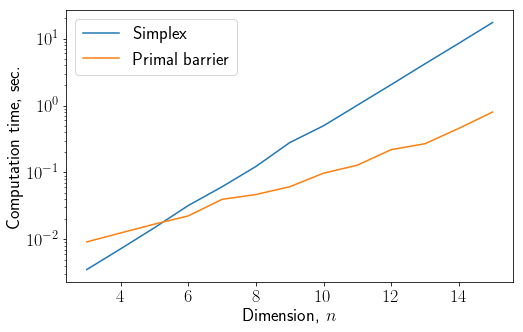

In [13]:
plt.figure(figsize=(8, 5))
plt.semilogy(n_list, times_simplex, label="Simplex")
plt.semilogy(n_list, times_barrier_simple, label="Primal barrier")
plt.legend(fontsize=18)
plt.xlabel("Dimension, $n$", fontsize=18)
plt.ylabel("Computation time, sec.", fontsize=18)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

### Комментарии

- Было показано, что прямой метод эквивалентен методу Кармаркара
- Использует информацию только о прямой задаче
- Начальное приближение должно лежать в допустимом множестве - отдельная задача

## Резюме 

1. История развития теории линейного программирования и текущее состояние
2. Концепция методов внутренней точки
3. Прямой метод решения задачи линейного программирования